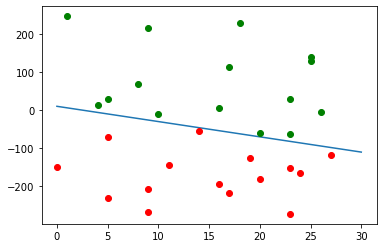

[  10.  -10.    1.   26.   -4.    1.   25.  140.    1.    8.   68.    1.
    9.  214.    1.   16.    6.    1.    5.   30.    1.   17.  112.    1.
    1.  246.    1.   23.   28.    1.   25.  130.    1.    4.   14.    1.
   18.  228.    1.   23.  -62.    1.   20.  -60.    1.   11. -144.   -1.
   17. -218.   -1.    9. -266.   -1.    0. -150.   -1.    5.  -70.   -1.
   19. -126.   -1.    9. -206.   -1.   27. -118.   -1.   23. -272.   -1.
   20. -180.   -1.    5. -230.   -1.   24. -166.   -1.   14.  -56.   -1.
   23. -152.   -1.   16. -194.   -1.]


In [274]:
import numpy as np
import matplotlib.pyplot as plt

#random
def rand_samples(m, b, n_points, rand):
    x_coors ,y_coors,labels,= np.array([]), np.array([]), np.array([]) 
    c = 10 if m >= 0 else -10

    p_num = int(n_points / 2)
    neg_num = n_points - p_num
    for state, n_points in [['pos', p_num], ['neg', neg_num]]:
        x = np.random.randint(0, rand, n_points)
        r = np.random.randint(1, rand, n_points)

        if state == 'pos':
            y = m * x + b - (r * c)
            labels = np.append(labels, np.ones(n_points, dtype=int))
        else:
            y = m * x + b + (r * c)
            labels = np.append(labels, -1*np.ones(n_points, dtype=int))

        x_coors=np.append(x_coors, x)    
        y_coors=np.append(y_coors, y)    

    return x_coors, y_coors, labels
if __name__ == '__main__':
    w1, w0 = 2, 1
    #w1=m,w0=b

    n_points = 2000
    rand = 2000
    p_num = int(n_points / 2)

    x = np.arange(rand + 1)  
    y = w1* x + w0
    plt.plot(x, y)

    # randomly generate points
    x_coors, y_coors, labels = rand_samples(w1, w0, n_points, rand)

    # plot random points. Blue: positive, red: negative
    plt.plot(x_coors[:p_num], y_coors[:p_num], 'o', color='green')   # positive
    plt.plot(x_coors[p_num:], y_coors[p_num:], 'o', color='red')    # negative
    plt.show()
    m=np.array([])
for i in range(n_points):
        m=np.append(m,[x_coors[i],y_coors[i],labels[i]])
print (m)

iterator: 0
iterator: 1
iterator: 2
iterator: 3
iterator: 4


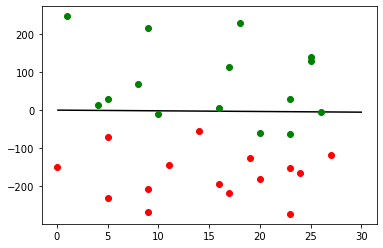

In [275]:
#pocket
def sign(z):
    if z > 0:
        return 1
    else:
        return -1
w = np.array([0.,0.,0.])
error = 1
iterator = 0

def error_rate(w):
    error = 0.0
    for i in range(n_points):
        x=[1.,x_coors[i],y_coors[i]]
        y=labels[i]
        if sign(np.dot(w,x)) != y:
            error = error +1.0
    return error/n_points
while n_points:
    for i in range(n_points):
        x=[1.,x_coors[i],y_coors[i]]
        y=labels[i]
        if sign(np.dot(w,x)) != y:
            print("iterator: "+str(iterator))
            iterator += 1
            error += 1
            
            if y ==1:
                wt =w+x
            else: 
                wt =w-x
            error0 = error_rate(w)
            error1 = error_rate(wt)   
            if error1 < error0:
                w = wt
                error = error1
                x_decision_boundary = np.linspace(0.1,2000)
                y_decision_boundary = (-w[1]/w[2])*x_decision_boundary - (w[0]/w[2])
    break
                 
plt.plot(x_decision_boundary, y_decision_boundary,color='black')
plt.plot(x_coors[:p_num], y_coors[:p_num], 'o', color='green')   # positive
plt.plot(x_coors[p_num:], y_coors[p_num:], 'o', color='red')    # negative
plt.show()

iterator: 0
iterator: 1
iterator: 2
iterator: 3
iterator: 4
iterator: 5
iterator: 6
iterator: 7
iterator: 8
iterator: 9
iterator: 10
iterator: 11
iterator: 12
iterator: 13
iterator: 14
iterator: 15
iterator: 16
iterator: 17
iterator: 18
iterator: 19
iterator: 20
iterator: 21
iterator: 22
iterator: 23
iterator: 24
iterator: 25
iterator: 26
iterator: 27
iterator: 28
iterator: 29
iterator: 30
iterator: 31
iterator: 32
iterator: 33
iterator: 34
iterator: 35


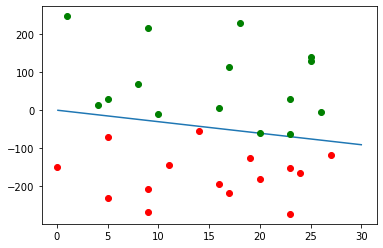

In [276]:
#pla
def sign(z):
    if z > 0:
        return 1
    else:
        return -1
w = np.array([0.,0.,0.])
error = 1
iterator = 0
while error != 0:
    error = 0
    for i in range(n_points):
        x=[1.,x_coors[i],y_coors[i]]
        y=labels[i]
        if sign(np.dot(w,x)) != y:
            print("iterator: "+str(iterator))
            iterator += 1
            error += 1
            if y ==1:
                w +=x
            else: 
                w -=x           
            x_decision_boundary = np.linspace(0.1,30)
            y_decision_boundary = (-w[1]/w[2])*x_decision_boundary - (w[0]/w[2])
            
plt.plot(x_decision_boundary, y_decision_boundary)
plt.plot(x_coors[:p_num], y_coors[:p_num], 'o', color='green')   # positive
plt.plot(x_coors[p_num:], y_coors[p_num:], 'o', color='red')    # negative
plt.show()

